![banner](./images/banner.png "banner")

# <font color=#6290C3>Modelo de aprendizaje automático para la predicción del Ratio Internacional Normalizado (INR) en pacientes bajo terapia con Antagonistas de la Vitamina K </font>

1. [Descripción del proyecto](#project-description)  
    1.1 [Objetivos](#project-description-goal)  
    1.2 [Data](#project-description-data)  
    1.3 [Software](#project-description-software)  

2. [Exploración y visualización de datos](#project-description)  
    2.1 [Carga de datos](#project-description-goal)  
    2.2 [Generación del csv](#project-description-data)  
    2.3 [Limpieza de datos](#project-description-data)  
    2.4 [Feature Importance y análisis de la variable target](#project-description-data)   
    2.4.1 [Oversampling data](#project-description-data) 

<h2 id="project-description"><font color="#6290C3">1. Descripción del proyecto</font></h2>
Este proyecto consiste en una predición de datos ....

- Es una tarea supervisada, es decir, el modelo se ha de entrar con muchos datos. Una vez entrenado el modelo, lo aplicamos a una nueva fila donde falta un valor, aquello que queremos predecir, y si el entrenamiento fue bueno, el modelo podrá predecir ese dato que falta. Las columnas para las que sí conocemos siempre todos los valores se llaman "características" o "features" en inglés.

- El dato que les falta a esas nuevas filas es el correspondiente a la columna 'target' (también llamado "destino" "objetivo" o "outcome") y es lo que intentamos predecir, en este caso, es la clase a la que pertenece cada fila.

- La columna 'target' tiene valores continuos, por lo que usaremos modelos de regresión.

- Los datos de nuestra columna "target" puede tomar distintos valores entre los rangos 0.1 y 3.0

- Si los datos no hubieran sido etiquetados (es decir, las clases no estuvieran definidas desde el inicio), necesitaríamos un modelo de aprendizaje automático no supervisado (es decir, el modelo debe encontrar los grupos o 'clusters' en inglés).

Ajustaremos los modelos de regresión de aprendizaje automático más populares a unos datos de pacientes con anticoagulantes y seleccionaremos el modelo con mejor rendimiento. Para verificar el rendimiento del modelo, separamos aleatoriamente el conjunto de datos en 3 subconjuntos:

- Un subconjunto de datos para entrenar el modelo: representan los datos 'antiguos', donde no faltan valores, es decir, todos los valores de todas las columnas incluida la 'target' son conocidos, así sabemos si eses pacientes sufrieron o no fallo cardíaco,

- Un subconjunto de los datos para validar el modelo: representan datos 'nuevos' porque reservamos los valores de la columna 'target', los separamos y los guardamos, es decir, pretendemos que no existen, como si fueran nueves pacientes, le damos ese subconjunto de validación al modelo ya entrenado y comparamos los resultados del modelo, es decir, sus prediciones, con los valores reales que teníamos reservados. Como ajustaremos los parámetros para hacer que los resultados del modelo se acerquen cada vez más a los valores reales, el modelo verá este conjunto de datos de validación con mucha frecuencia, lo que puede hacer que el modelo se desvíe, muestre preferencia o sesgo ('bias' en inglés) hacia el conjunto de datos de validación (explicamos la definición de sesgo en los siguientes Jupyter Notebooks sobre Explicabilidad XAI.ipynb y Cuantificación de Incertidumbre UQ.ipynb en este mismo repositorio), es decir, puede estar sobreajustado ('overfitted') y no generalizar bien cuando lo aplicamos a otros datos, por eso separamos un último grupo:

- Un subconjunto de los datos para probar los resultados del modelo: para la verificación final que compara los resultados del modelo ajustado con datos que el modelo entrenado y validado nunca ha visto antes; es la mejor manera que tenemos de simular nuevos datos reales. 

<h3 id="project-description-goal" style="color:#6290C3;">1.1 Objetivos</h3>

El objetivo es predecir el INR de un paciente con anticoagulantes mediante varaibles analiticas y ritmo de vida... y otras características consideradas factores de riesgo. Las conclusiones de este análisis pueden ayudar en la detección temprana y la prevención de diagnosticos complicados.

<h3 id="project-description-goal" style="color:#6290C3;">1.2 Datos</h3>

El conjunto de datos que usamos para entrenar nuestro modelo son datos sinteticos de Synthnea, un software opensource de estados unidos. Este programa generará mediante sus comandos historias completas de pacientes.

Para ejecutar el programa ejecutremos `java -jar synthea.jar` este procesará los valores que se indiquen en el archivo de configuración **synthea.properties** indicaremos lo siguiente:

- default_population = 5.000 -> cantida de pacientes
- exporter.csv.export = true  -> se exportaran los datos a ficheros csv
- exporter.csv.append_mode = true   -> si se ejecuta otra vez el archivo se actualizaran los datos del csv
- generate.modules = cardiovascular_disease, atrial_fibrillation, venous_thromboembolism  -> permite priorizar la generación de pacientes con estas patologias.


Synthea export data as CSV into `./output/csv`.  Las historias de pacientes se reparten en los siguientes csv.

| File | Description |
|------|-------------|
| [`allergies.csv`](#allergies) | Patient allergy data. |
| [`careplans.csv`](#careplans) | Patient care plan data, including goals. |
| [`claims.csv`](#claims) | Patient claim data. |
| [`claims_transactions.csv`](#claims-transactions) | Transactions per line item per claim. |
| [`conditions.csv`](#conditions) | Patient conditions or diagnoses. |
| [`devices.csv`](#devices) | Patient-affixed permanent and semi-permanent devices. |
| [`encounters.csv`](#encounters) | Patient encounter data. |
| [`imaging_studies.csv`](#imaging-studies) | Patient imaging metadata. |
| [`immunizations.csv`](#immunizations) | Patient immunization data. |
| [`medications.csv`](#medications) | Patient medication data. |
| [`observations.csv`](#observations) | Patient observations including vital signs and lab reports. |
| [`organizations.csv`](#organizations) | Provider organizations including hospitals. |
| [`patients.csv`](#patients) | Patient demographic data. |
| [`payer_transitions.csv`](#payer-transitions) | Payer Transition data (i.e. changes in health insurance). |
| [`payers.csv`](#payers) | Payer organization data. |
| [`procedures.csv`](#procedures) | Patient procedure data including surgeries. |
| [`providers.csv`](#providers) | Clinicians that provide patient care. |
| [`supplies.csv`](#supplies) | Supplies used in the provision of care. |


Para nuestro analisis solo utilizaremos:

# Observations
| | Column Name | Data Type | Required? | Description |
|-|-------------|-----------|-----------|-------------|
| | Date | iso8601 UTC Date (`yyyy-MM-dd'T'HH:mm'Z'`) | `true` | The date and time the observation was performed. |
| | Patient | UUID | `true` | Foreign key to the Patient. |
| | Encounter | UUID | `true` | Foreign key to the Encounter where the observation was performed. |
| | Category | String | `false` | Observation category. |
| | Code | String | `true` | Observation or Lab code from LOINC |
| | Description | String | `true` | Description of the observation or lab. |
| | Value | String | `true` | The recorded value of the observation. Often numeric, but some values can be verbose, for example, multiple-choice questionnaire responses. |
| | Units | String | `false` | The units of measure for the value. |
| | Type | String | `true` | The datatype of `Value`: `text` or `numeric` |


# Patients
| | Column Name | Data Type | Required? | Description |
|-|-------------|-----------|-----------|-------------|
| | Id | UUID | `true` | Primary Key. Unique Identifier of the patient. |
| | BirthDate | Date (`YYYY-MM-DD`) | `true` | The date the patient was born. |
| | DeathDate | Date (`YYYY-MM-DD`) | `false` | The date the patient died. |
| | SSN | String | `true` | Patient Social Security identifier. |
| | Drivers | String | `false` | Patient Drivers License identifier. |
| | Passport | String | `false` | Patient Passport identifier. |
| | Prefix | String | `false` | Name prefix, such as `Mr.`, `Mrs.`, `Dr.`, etc. |
| | First | String | `true` | First name of the patient. |
| | Middle | String | `false` | Middle name of the patient. |
| | Last | String | `true` | Last or surname of the patient. |
| | Suffix | String | `false` | Name suffix, such as `PhD`, `MD`, `JD`, etc. |
| | Maiden | String | `false` | Maiden name of the patient. |
| | Marital | String | `false` | Marital Status. `M` is married, `S` is single. Currently no support for divorce (`D`) or widowing (`W`) |
| | Race | String | `true` | Description of the patient's primary race. |
| | Ethnicity | String | `true` | Description of the patient's primary ethnicity. |
| | Gender | String | `true` | Gender. `M` is male, `F` is female. |
| | BirthPlace | String | `true` | Name of the town where the patient was born. |
| | Address | String | `true` | Patient's street address without commas or newlines. |
| | City | String | `true` | Patient's address city. |
| | State | String | `true` | Patient's address state. |
| | County | String | `false` | Patient's address county. |
| | FIPS County Code | String | `false` | Patient's FIPS county code. |
| | Zip | String | `false` | Patient's zip code. |
| | Lat | Numeric | `false` | Latitude of Patient's address. |
| | Lon | Numeric | `false` | Longitude of Patient's address. |
| | Healthcare_Expenses | Numeric | `true` | The total lifetime cost of healthcare to the patient (i.e. what the patient paid). |
| | Healthcare_Coverage | Numeric | `true` | The total lifetime cost of healthcare services that were covered by Payers (i.e. what the insurance company paid). |
| | Income | Numeric | `true` | Annual income for the Patient |


El variable 'target', es decir, lo que queremos predecir, se llama "INR", y es una variable continua que toma las siguientes interpretaciones:

- <2.0: sí, es decir, pacientes que sí presentan riesgo de padecer una cardiopatía,
- 2.0 y 3.0: no, es decir, pacientes que no presentan riesgo de padecer una cardiopatía.
- 3.0: no, es decir, pacientes que no presentan riesgo de padecer una cardiopatía.

## 1.3 Software

Importamos las siguientes librerías:

In [4]:
import pandas as pd
import numpy as np

#utils files
from utils.cleaner_category_match import *
from utils.cleaner_shorter_categories import *

# data exploration and preparation  
#from sklearn.metrics import mutual_info_score, roc_auc_score
#from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction import DictVectorizer 
#from sklearn.preprocessing import StandardScaler 

# plotting and displaying in the notebook
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
from sklearn import tree

#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# machine learning models
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier


# model evaluation
#from sklearn.metrics import accuracy_score, f1_score, auc, recall_score, precision_score, confusion_matrix
#from sklearn.metrics import make_scorer
#from sklearn.model_selection import GridSearchCV, KFold, cross_val_score





# ignore warnings
#import warnings
#warnings.filterwarnings("ignore")

#%matplotlib inline

# 2. Exploración y visualización de datos

## 2.1 Carga de datos

Vamos a cargar los datos del fichero `patients.csv`:

In [5]:
df_patients = pd.read_csv("data/patients.csv")
df_patients.head()
#df_patients.info()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,MIDDLE,LAST,...,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,ae1acd06-3eb7-c5c5-738f-c9895ef4150d,2016-03-11,NaN,999-57-5423,NaN,NaN,NaN,Norris589,Bill567,Hermiston71,...,Wareham,Massachusetts,Plymouth County,NaN,0,41.766794,-70.652862,1543.07,17566.83,10551
1,a48ad472-6249-d9df-9352-6d04658dc834,1995-01-05,NaN,999-62-7499,S99923922,X56579640X,Mr.,Daron260,Denver542,Mohr916,...,Dartmouth,Massachusetts,Bristol County,NaN,0,41.521893,-70.941710,12243.27,725326.99,14047
2,6875adfb-1f3e-1e01-2c4d-1dc19a5c04bc,2018-07-02,NaN,999-27-9058,NaN,NaN,NaN,Anja508,NaN,Bergstrom287,...,Gloucester,Massachusetts,Essex County,25009.0,1930,42.630311,-70.673016,1664.88,14130.35,5879
3,56689f99-ca4d-67eb-12d6-5b0f0dc45b59,2014-11-04,NaN,999-29-5447,NaN,NaN,NaN,Jeneva675,NaN,Gerhold939,...,Quincy,Massachusetts,Norfolk County,25021.0,2186,42.233034,-71.052074,40323.31,4448.38,905888
4,9169a441-7be6-032e-690b-0c09c868c9e7,2002-08-22,NaN,999-67-4934,S99982373,X5968327X,Ms.,Sonia106,Carlota980,Laboy63,...,Malden,Massachusetts,Middlesex County,25017.0,2155,42.449900,-71.059329,72881.03,3817.85,130763


El conjunto de datos contiene información de **5826 pacientes y 28 variables que describen sus características básicas y demográficas**, como edad, género, etnia, estado civil, lugar de nacimiento e ingresos. Incluye además datos administrativos (por ejemplo, número de seguro social o pasaporte) y médicos (como cobertura de salud). En general, ofrece una visión completa del perfil socio-demográfico de cada paciente.

Vamos a cargar los datos del fitchero `medications.csv`

In [6]:
df_medications = pd.read_csv("data/medications.csv")
df_medications.head()

,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,2016-05-15T04:16:23Z,2016-05-26T21:16:23Z,ae1acd06-3eb7-c5c5-738f-c9895ef4150d,df166300-5a78-3502-a46a-832842197811,ae1acd06-3eb7-c5c5-518b-0d684699d637,834061,Penicillin V Potassium 250 MG Oral Tablet,71.14,21.14,1,71.14,43878008.0,Streptococcal sore throat (disorder)
1,2018-05-30T11:16:23Z,2018-06-13T11:16:23Z,ae1acd06-3eb7-c5c5-738f-c9895ef4150d,df166300-5a78-3502-a46a-832842197811,ae1acd06-3eb7-c5c5-f865-967d31a68c55,313820,Acetaminophen 160 MG Chewable Tablet,47.21,0.00,1,47.21,NaN,NaN
2,2019-11-20T11:57:35Z,2020-02-29T11:57:35Z,ae1acd06-3eb7-c5c5-738f-c9895ef4150d,df166300-5a78-3502-a46a-832842197811,ae1acd06-3eb7-c5c5-33e6-7ab6ee0e09a1,313820,Acetaminophen 160 MG Chewable Tablet,45.86,0.00,3,137.58,NaN,NaN
3,2023-03-30T12:29:17Z,2023-05-20T12:29:17Z,ae1acd06-3eb7-c5c5-738f-c9895ef4150d,df166300-5a78-3502-a46a-832842197811,ae1acd06-3eb7-c5c5-0024-f3f732c42c2b,198405,Ibuprofen 100 MG Oral Tablet,141.13,0.00,1,141.13,NaN,NaN
4,1996-07-02T16:13:27Z,NaN,a48ad472-6249-d9df-9352-6d04658dc834,df166300-5a78-3502-a46a-832842197811,a48ad472-6249-d9df-312f-fd3804195749,665078,Loratadine 5 MG Chewable Tablet,76.44,26.44,357,27289.08,NaN,NaN


El conjunto de datos contiene información de **313751 pacientes distribuidos en 13 variables**, que incluyen detalles sobre fechas de atención, identificación del paciente, tipo de cobertura, códigos y descripciones de las medicaciones, costos asociados y dispensas.

Vamos a cargar los datos del fichero `observations.csv`:

In [7]:
df_observations = pd.read_csv("data/observations.csv")
df_observations.head()
#df_observations.info()

,DATE,PATIENT,ENCOUNTER,CATEGORY,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2016-03-11T11:16:23Z,ae1acd06-3eb7-c5c5-738f-c9895ef4150d,ae1acd06-3eb7-c5c5-7230-a057ff4f1901,vital-signs,8302-2,Body Height,51.6,cm,numeric
1,2016-03-11T11:16:23Z,ae1acd06-3eb7-c5c5-738f-c9895ef4150d,ae1acd06-3eb7-c5c5-7230-a057ff4f1901,vital-signs,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,3.0,{score},numeric
2,2016-03-11T11:16:23Z,ae1acd06-3eb7-c5c5-738f-c9895ef4150d,ae1acd06-3eb7-c5c5-7230-a057ff4f1901,vital-signs,29463-7,Body Weight,3.2,kg,numeric
3,2016-03-11T11:16:23Z,ae1acd06-3eb7-c5c5-738f-c9895ef4150d,ae1acd06-3eb7-c5c5-7230-a057ff4f1901,vital-signs,77606-2,Weight-for-length Per age and sex,1.4,%,numeric
4,2016-03-11T11:16:23Z,ae1acd06-3eb7-c5c5-738f-c9895ef4150d,ae1acd06-3eb7-c5c5-7230-a057ff4f1901,vital-signs,8289-1,Head Occipital-frontal circumference Percentile,35.2,%,numeric


Este conjunto de datos es considerablemente amplio, con **4627376 registros y 9 variables** que describen distintas interacciones clínicas de los pacientes. Contiene información sobre la fecha, tipo de encuentro, categoría médica, código y descripción de cada evento, así como los valores y unidades asociados. Representa un registro detallado de las actividades y mediciones realizadas en el contexto sanitario.

Dentro de este conjunto se identifica nuestra **variable objetivo 'target', que indica si el paciente cuenta con un registro de INR** y el valor correspondiente. Esta variable permite evaluar la presencia y magnitud de dicha medición, siendo la clave de este análisis.

## 2.2 Generación del csv

Se filtran los registros para incluir únicamente **pacientes vivos**, **medicación especifica de anticoagulantes** y aquellos pacientes con **controles de INR**, dado que el análisis se enfoca en esta medición. A continuación, se procede a **limpiar y depurar** los datos del subconjunto obtenido, asegurando su calidad y consistencia para el estudio.

**Pacientes difuntos**  
La columna DeathDate indica la fecha de fallecimiento; se eliminarán todos los registros donde este valor no sea nulo, conservando únicamente a los pacientes vivos para el análisis.

In [8]:
print("Cantidad de pacientes vivos:")
print(df_patients['DEATHDATE'].isna().sum())

print("Cantidad de pacientes difuntos:")
print(df_patients['DEATHDATE'].notna().sum())


Cantidad de pacientes vivos:
5000
Cantidad de pacientes difuntos:
693


Actualmente contamos con **5,000 pacientes vivos y 826 pacientes difuntos**. Para el análisis, conservaremos únicamente a los pacientes vivos, eliminando los registros correspondientes a los fallecidos.

In [9]:
df_patients = df_patients[df_patients['DEATHDATE'].isna()]

Una vez filtrados, de cada paciente solo nos interesan tres variables clave: edad, género e identificador, que serán utilizadas para los análisis posteriores.

Para la variable **edad**, primero calculamos los años a partir de la fecha de nacimiento utilizando la diferencia con la fecha actual. Aquellos pacientes que no cuenten con fecha de nacimiento registrada tendrán su edad rellenada con la mediana del conjunto, asegurando que no queden valores nulos y manteniendo la coherencia del dataset.

In [10]:
#convertimos la fecha de nacimiento en formato datetime para el calculo
df_patients['BIRTHDATE'] = pd.to_datetime(df_patients['BIRTHDATE'], errors='coerce')

df_patients['AGE'] = ((pd.Timestamp('today') - df_patients['BIRTHDATE']).dt.days / 365.25).astype(int)
df_patients['AGE'] = df_patients['AGE'].fillna(df_patients['AGE'].median())
df_patients = df_patients[['Id','AGE', 'GENDER']]

De cada paciente solo nos interesan tres variables clave de las observaciones : paciente, descripción y valores (incluimos las unidades).

In [11]:
df_observations = df_observations[['PATIENT','DESCRIPTION', 'VALUE']]
df_observations.head(5)

,PATIENT,DESCRIPTION,VALUE
0,ae1acd06-3eb7-c5c5-738f-c9895ef4150d,Body Height,51.6
1,ae1acd06-3eb7-c5c5-738f-c9895ef4150d,Pain severity - 0-10 verbal numeric rating [Sc...,3.0
2,ae1acd06-3eb7-c5c5-738f-c9895ef4150d,Body Weight,3.2
3,ae1acd06-3eb7-c5c5-738f-c9895ef4150d,Weight-for-length Per age and sex,1.4
4,ae1acd06-3eb7-c5c5-738f-c9895ef4150d,Head Occipital-frontal circumference Percentile,35.2


### Simplificación de las variables y pivotación

Las descripciones de las observaciones indican qué tipo de medición se ha realizado a cada paciente. Para tener una visión clara del contenido del dataset, extraeremos un listado único de los valores registrados en esta columna, lo que nos permitirá identificar y comprender todas las mediciones disponibles.

In [12]:
df_observations['DESCRIPTION'].unique()

array(['Body Height',
       'Pain severity - 0-10 verbal numeric rating [Score] - Reported',
       'Body Weight', 'Weight-for-length Per age and sex',
       'Head Occipital-frontal circumference Percentile',
       'Head Occipital-frontal circumference', 'Diastolic Blood Pressure',
       'Systolic Blood Pressure', 'Heart rate', 'Respiratory rate',
       'Leukocytes [#/volume] in Blood by Automated count',
       'Erythrocytes [#/volume] in Blood by Automated count',
       'Hemoglobin [Mass/volume] in Blood',
       'Hematocrit [Volume Fraction] of Blood by Automated count',
       'MCV [Entitic volume] by Automated count',
       'MCH [Entitic mass] by Automated count',
       'MCHC [Mass/volume] by Automated count',
       'Erythrocyte distribution width [Entitic volume] by Automated count',
       'Platelets [#/volume] in Blood by Automated count',
       'Platelet distribution width [Entitic volume] in Blood by Automated count',
       'Platelet mean volume [Entitic volume] in

Para simplificar el conjunto de variables, utilizamos los métodos auxiliares disponibles. En primer lugar, empleamos cleaner_category_match, que nos permite identificar cuántas variables categóricas existen dentro de cada categoría y cómo se emparejan con las cadenas de texto presentes en las observaciones. Este mismo módulo también facilita añadir o eliminar categorías según las necesidades del análisis, ofreciendo un control flexible sobre la organización del dataset.

Las categorías globales disponibles incluyen: vitals, hematology, chemistry coagulation, urinalysis, microbiology, infectious, immunology_allergy, oncology, ophthalmology_imaging, mental_health, social_determinants, demographics, substance_use, administrative y other.

Sin embargo, para este análisis nos centraremos únicamente en las categorías más relevantes: vitals, hematology, chemistry coagulation y un conjunto reducido de observaciones específicas relacionadas con el estado físico y conductual del paciente. Entre estas últimas se encuentran:

- Total score [DAST-10]: puntuación total del Drug Abuse Screening Test, un cuestionario que evalúa el riesgo o presencia de uso problemático de drogas.

- Total score [AUDIT-C]: puntuación del Alcohol Use Disorders Identification Test – Consumption, una medida breve que detecta consumo riesgoso de alcohol.

- PROMIS-10 Global Mental Health (GMH) score: indicador estandarizado que refleja el estado general de salud mental, incluyendo síntomas como ansiedad, depresión y bienestar emocional.

- PROMIS-10 Global Physical Health (GPH) score: medida que evalúa el estado general de salud física, considerando aspectos como dolor, fatiga, movilidad y percepción de salud.

Al quedarnos solo con estas categorías y métricas específicas, garantizamos que el análisis se centre en las variables más relevantes y que la información sea manejable y coherente para los objetivos del estudio.

In [13]:

# Diagnostico de las categorias existentes
diagnose_category_match(df_observations, 'urinalysis', column='DESCRIPTION')

# Eliminar valores de categorias concretas
df_observations = drop_categories(df_observations, ['urinalysis','microbiology','infectious','immunology_allergy','oncology','ophthalmology_imaging','mental_health','social_determinants','demographics','substance_use','administrative','other'], column='DESCRIPTION', fuzzy=True)

df_observations['DESCRIPTION'].unique()


=== Diagnosis for category: urinalysis ===
Variables in category: 28
Unique values in df['DESCRIPTION']: 300

Exact matches found: 27
Examples: ['WBCs', 'Protein [Presence] in Urine by Test strip', 'Hemoglobin.gastrointestinal.lower [Presence] in Stool by Immunoassay --1st specimen']

Partial matches found: 34
Examples: ['WBCs', 'Protein [Presence] in Urine by Test strip', 'Creatinine']
Dropping 2228151 rows from categories: ['urinalysis', 'microbiology', 'infectious', 'immunology_allergy', 'oncology', 'ophthalmology_imaging', 'mental_health', 'social_determinants', 'demographics', 'substance_use', 'administrative', 'other']
Sample of dropped values: ['Pain severity - 0-10 verbal numeric rating [Score] - Reported', 'Weight-for-length Per age and sex', 'Head Occipital-frontal circumference Percentile', 'Head Occipital-frontal circumference', 'Body mass index (BMI) [Percentile] Per age and sex']


array(['Body Height', 'Body Weight', 'Diastolic Blood Pressure',
       'Systolic Blood Pressure', 'Heart rate', 'Respiratory rate',
       'Leukocytes [#/volume] in Blood by Automated count',
       'Erythrocytes [#/volume] in Blood by Automated count',
       'Hemoglobin [Mass/volume] in Blood',
       'Hematocrit [Volume Fraction] of Blood by Automated count',
       'MCV [Entitic volume] by Automated count',
       'MCH [Entitic mass] by Automated count',
       'MCHC [Mass/volume] by Automated count',
       'Erythrocyte distribution width [Entitic volume] by Automated count',
       'Platelets [#/volume] in Blood by Automated count',
       'Platelet distribution width [Entitic volume] in Blood by Automated count',
       'Platelet mean volume [Entitic volume] in Blood by Automated count',
       'Tobacco smoking status', 'Body temperature',
       'Body mass index (BMI) [Ratio]',
       'Oxygen saturation in Arterial blood', 'Stress level',
       'Cholesterol [Mass/volume] in S

A continuación, dado que muchas variables poseen nombres extensos y poco intuitivos para utilizarlos como columnas del dataset, recurrimos al segundo método auxiliar: cleaner_shorter_categories. Este recurso nos permite acortar y estandarizar dichas cadenas, generando nombres más claros y manejables sin perder información relevante.

In [14]:
df_observations = shorten_variable_names(
    df_observations, 
    column='DESCRIPTION', 
    inplace=True  # Replace the column
)

df_observations['DESCRIPTION'].unique()



Shortened 592951/1916791 variable names (30.9%)


array(['Height', 'Weight', 'DBP', 'SBP', 'Heart_Rate', 'Respiratory_Rate',
       'WBC', 'RBC', 'Hemoglobin', 'Hematocrit', 'MCV', 'MCH', 'MCHC',
       'RDW', 'Platelets', 'PDW', 'MPV', 'Smoking_Status', 'Temperature',
       'BMI', 'O2_Saturation', 'Stress_Level', 'Cholesterol_Total',
       'Triglycerides', 'LDL', 'HDL', 'Glucose', 'BUN', 'Creatinine',
       'Calcium', 'Sodium', 'Potassium', 'Chloride', 'CO2', 'eGFR',
       'Protein', 'Albumin', 'Globulin', 'Bilirubin_Total', 'ALP', 'ALT',
       'AST', 'HbA1c', 'AUDIT_C', 'INR', 'PT', 'RDW_Ratio', 'Magnesium',
       'aPTT', 'NT_proBNP', 'Troponin_I', 'Neutrophils_Pct',
       'Lymphocytes_Pct', 'Monocytes_Pct', 'Eosinophils_Pct',
       'Basophils_Pct', 'Neutrophils_Abs', 'Lymphocytes_Abs',
       'Monocytes_Abs', 'Eosinophils_Abs', 'Basophils_Abs', 'pH_Arterial',
       'pCO2_Arterial', 'pO2_Arterial', 'HCO3_Arterial', 'FiO2',
       'D_Dimer', 'Ferritin', 'LDH', 'CK', 'CRP', 'Procalcitonin', 'IL6',
       'FEV1_FVC_Ratio', 'MM

Finalmente, realizaremos **un pivotado de los datos para transformar las entradas de ‘DESCRIPTION’ y ‘VALUE’ en columnas independientes**, cada una con sus valores correspondientes. Esto permite reorganizar la información en un formato más estructurado y adecuado para el análisis.

In [15]:
df_observations_pivot = df_observations.pivot_table(
    index='PATIENT',
    columns='DESCRIPTION',
    values='VALUE',
    aggfunc='first'
).reset_index()

df_observations_pivot = df_observations_pivot.rename_axis(None, axis=1)

df_observations_pivot.head()

,PATIENT,ACT,ALP,ALT,ALT_Elevated,AST,AST_Elevated,AUDIT_C,Abdominal_Exam,Albumin,...,WBC,Weight,aPTT,eGFR,pCO2_Arterial,pCO2_Venous,pH_Arterial,pH_Venous,pO2_Arterial,pO2_Venous
0,000d67c2-0a4a-9a55-b263-c48c288deeee,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,7.6,47.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000e0ae6-db59-4fe0-b099-13be72a72a42,115.2,71.3,17.9,NaN,37.5,NaN,2.0,NaN,4.8,...,7.2,85.5,31.6,61.2,37.7,44.0,7.2,7.3,98.9,45.0
2,00164874-b655-b577-f4a0-e170782b0690,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,8.9,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0018d8bf-328d-3cb7-5d7d-c363f4c5da1e,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,9.9,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00436b14-83c0-df1e-8f99-c8b7ba28072f,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,8.4,98.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A continuación, uniremos la información de los pacientes con sus respectivas observaciones utilizando el identificador único (Id) de cada paciente. Esta combinación nos permitirá consolidar los datos en un solo dataset, facilitando el análisis y asegurando que toda la información relevante de cada paciente esté centralizada.

In [16]:
# - df_patients (izquierda) tiene la columna clave 'Id'
# - df_observations (derecha) tiene la columna clave 'PATIENT'

df_patients_observations = pd.merge(
    df_patients,        # DataFrame de la izquierda
    df_observations_pivot,  # DataFrame de la derecha
    left_on='Id',           # <--- Columna clave en el DataFrame de la izquierda (df_patients)
    right_on='PATIENT',     # <--- Columna clave en el DataFrame de la derecha (df_observations)
    how='left'              # Tipo de unión (mantiene todos los pacientes del df_patients)
)

#Eliminamos la columna PATIENT para no tener duplicados en el identificador
columnas_a_eliminar = ['PATIENT']
df_patients_observations = df_patients_observations.drop(columns=columnas_a_eliminar)
df_patients_observations.head()

,Id,AGE,GENDER,ACT,ALP,ALT,ALT_Elevated,AST,AST_Elevated,AUDIT_C,...,WBC,Weight,aPTT,eGFR,pCO2_Arterial,pCO2_Venous,pH_Arterial,pH_Venous,pO2_Arterial,pO2_Venous
0,ae1acd06-3eb7-c5c5-738f-c9895ef4150d,9,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.7,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a48ad472-6249-d9df-9352-6d04658dc834,30,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.3,78.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6875adfb-1f3e-1e01-2c4d-1dc19a5c04bc,7,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,56689f99-ca4d-67eb-12d6-5b0f0dc45b59,11,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.7,8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9169a441-7be6-032e-690b-0c09c868c9e7,23,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.2,55.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Pacientes con INR**

Dado que este análisis **se centrará en pacientes con medición de INR**, eliminaremos todas las filas correspondientes a aquellos que no cuentan con esta observación. Tras este filtrado, nos quedamos con un total de 286 pacientes, sobre los cuales realizaremos el análisis detallado.

In [17]:
df_patients_observations_INR = df_patients_observations[
    (df_patients_observations['INR'] != 0) & 
    (df_patients_observations['INR'].notna())
]

df_patients_observations_INR.head()


,Id,AGE,GENDER,ACT,ALP,ALT,ALT_Elevated,AST,AST_Elevated,AUDIT_C,...,WBC,Weight,aPTT,eGFR,pCO2_Arterial,pCO2_Venous,pH_Arterial,pH_Venous,pO2_Arterial,pO2_Venous
19,b195bb80-5573-fad3-6bda-1b90a5b06441,55,F,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,9.4,79.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,ca4c7b74-6913-7b3f-31a9-716de55fcb92,61,M,NaN,91.1,9.4,NaN,1.3,NaN,3.0,...,5.1,74.6,28.5,7.9,NaN,NaN,NaN,NaN,NaN,NaN
24,f1e74d04-5033-b9d5-34c2-9d65401e90a9,75,M,127.4,23.0,34.9,NaN,25.6,NaN,1.0,...,8.6,92.3,38.4,75.7,38.1,46.7,7.2,7.3,99.3,43.1
47,ef4ee01b-b0a7-d6ea-b613-0d78c893e33c,98,F,NaN,66.3,51.4,NaN,34.8,NaN,2.0,...,3.8,74.4,NaN,86.4,NaN,NaN,NaN,NaN,NaN,NaN
57,16342f9e-307c-9c4a-d4b0-866cac94d751,44,M,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,9.8,104.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Medicación especifica de anticoagulantes**

A continuación, identificaremos a los pacientes que toman anticoagulantes, filtrando únicamente las medicaciones que sean anticoagulantes.

In [18]:
df_medications['DESCRIPTION'].unique()

array(['Penicillin V Potassium 250 MG Oral Tablet',
       'Acetaminophen 160 MG Chewable Tablet',
       'Ibuprofen 100 MG Oral Tablet', 'Loratadine 5 MG Chewable Tablet',
       'NDA020800 0.3 ML Epinephrine 1 MG/ML Auto-Injector',
       'Acetaminophen 300 MG / Hydrocodone Bitartrate 5 MG Oral Tablet',
       'tramadol hydrochloride 50 MG Oral Tablet',
       'sodium fluoride 0.0272 MG/MG Oral Gel',
       'Amoxicillin 500 MG Oral Tablet', 'Cefuroxime 250 MG Oral Tablet',
       'amoxicillin 500 MG / clavulanate 125 MG Oral Tablet',
       'Levora 0.15/30 28 Day Pack', 'Natazia 28 Day Pack',
       'Seasonique 91 Day Pack', 'ferrous sulfate 325 MG Oral Tablet',
       'Vitamin B12 5 MG/ML Injectable Solution',
       'Simvastatin 10 MG Oral Tablet',
       'Meperidine Hydrochloride 50 MG Oral Tablet',
       'Ibuprofen 200 MG Oral Tablet',
       'Acetaminophen 325 MG / Oxycodone Hydrochloride 5 MG Oral Tablet',
       'Hydrochlorothiazide 25 MG Oral Tablet',
       'lisinopril 10 M

Eliminamos medicamentos

In [19]:
from utils.cleaner_category_match import categorize_meds, drop_meds_by_category

# Categorizar medicamentos
df_medications = categorize_meds(df_medications)
# Ahora sí se puede filtrar
df_medications = drop_meds_by_category(df_medications, [
    'antibiotic', 'analgesic','antihypertensive','antidiabetic','hormone','statin','inhaler','immunotherapy', 'other'
])


Dropping 262039 medications from categories: ['antibiotic', 'analgesic', 'antihypertensive', 'antidiabetic', 'hormone', 'statin', 'inhaler', 'immunotherapy', 'other']
Sample dropped: ['Penicillin V Potassium 250 MG Oral Tablet', 'Acetaminophen 160 MG Chewable Tablet', 'Ibuprofen 100 MG Oral Tablet', 'Loratadine 5 MG Chewable Tablet', 'NDA020800 0.3 ML Epinephrine 1 MG/ML Auto-Injector']


In [20]:
df_medications['DESCRIPTION'].unique()

array(['0.4 ML Enoxaparin sodium 100 MG/ML Prefilled Syringe',
       '1 ML Enoxaparin sodium 150 MG/ML Prefilled Syringe', 'Warfarin',
       '1 ML heparin sodium  porcine 5000 UNT/ML Injection',
       'Warfarin Sodium 5 MG Oral Tablet',
       'heparin sodium  porcine 100 UNT/ML Injectable Solution',
       'warfarin sodium 5 MG Oral Tablet', 'Apixaban',
       'heparin sodium  porcine 1000 UNT/ML Injectable Solution',
       'enoxaparin sodium 100 MG/ML Injectable Solution', 'Rivaroxaban'],
      dtype=object)

Los modelos de aprendizaje automático suelen mejorar su precisión cuando se entrenan con grandes volúmenes de datos; sin embargo, este conjunto podría resultar insuficiente para alcanzar un rendimiento óptimo, por lo que verificaremos si es el caso.

En las siguientes secciones limpiaremos y prepararemos los datos para garantizar que el modelo trabaje con la información más fiable posible. Esto incluye corregir errores de etiquetado o tipográficos, manejar valores faltantes y ajustar tipos de datos.

Además, muchos modelos no aceptan datos sin escalar o valores nulos, y podrían no converger si la información no está correctamente normalizada. Dado que buscamos que el modelo detecte patrones que las personas no pueden inferir fácilmente, aprovechamos la información que sí podemos depurar —como corregir inconsistencias— para facilitar su aprendizaje y optimizar el proceso.

In [21]:
df_medications = df_medications[['PATIENT','DESCRIPTION']]

# - df_patients (izquierda) tiene la columna clave 'Id'
# - df_observations (derecha) tiene la columna clave 'PATIENT'

df_patients_observations_medications_INR = pd.merge(
    df_patients_observations_INR,        # DataFrame de la izquierda
    df_medications,  # DataFrame de la derecha
    left_on='Id',           # <--- Columna clave en el DataFrame de la izquierda (df_patients)
    right_on='PATIENT',     # <--- Columna clave en el DataFrame de la derecha (df_observations)
    how='left'              # Tipo de unión (mantiene todos los pacientes del df_patients)
)

#Eliminamos la columna PATIENT para no tener duplicados en el identificador
columnas_a_eliminar = ['PATIENT']
df_patients_observations_medications_INR = df_patients_observations_medications_INR.drop(columns=columnas_a_eliminar)
df_patients_observations_medications_INR = df_patients_observations_medications_INR.rename(columns={'DESCRIPTION': 'Medication'})
df_patients_observations_medications_INR.to_csv('data/df_patients_observations_medications_INR.csv')
df_patients_observations_medications_INR.head()

,Id,AGE,GENDER,ACT,ALP,ALT,ALT_Elevated,AST,AST_Elevated,AUDIT_C,...,Weight,aPTT,eGFR,pCO2_Arterial,pCO2_Venous,pH_Arterial,pH_Venous,pO2_Arterial,pO2_Venous,Medication
0,b195bb80-5573-fad3-6bda-1b90a5b06441,55,F,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,79.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ca4c7b74-6913-7b3f-31a9-716de55fcb92,61,M,NaN,91.1,9.4,NaN,1.3,NaN,3.0,...,74.6,28.5,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,f1e74d04-5033-b9d5-34c2-9d65401e90a9,75,M,127.4,23.0,34.9,NaN,25.6,NaN,1.0,...,92.3,38.4,75.7,38.1,46.7,7.2,7.3,99.3,43.1,1 ML heparin sodium porcine 5000 UNT/ML Injec...
3,ef4ee01b-b0a7-d6ea-b613-0d78c893e33c,98,F,NaN,66.3,51.4,NaN,34.8,NaN,2.0,...,74.4,NaN,86.4,NaN,NaN,NaN,NaN,NaN,NaN,Warfarin Sodium 5 MG Oral Tablet
4,ef4ee01b-b0a7-d6ea-b613-0d78c893e33c,98,F,NaN,66.3,51.4,NaN,34.8,NaN,2.0,...,74.4,NaN,86.4,NaN,NaN,NaN,NaN,NaN,NaN,Warfarin


## 2.3 Limpieza de datos

### Valores faltantes y data types

In [22]:
df_patients_observations_medications_INR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2283 entries, 0 to 2282
Columns: 104 entries, Id to Medication
dtypes: int32(1), object(103)
memory usage: 1.8+ MB


El conjunto de datos presenta una composición muy desequilibrada: aunque contiene 1255 registros y un amplio abanico de 100 variables clínicas, la disponibilidad de información varía drásticamente entre ellas. 
Por un lado, las **mediciones básicas; como los signos vitales, los parámetros antropométricos y la mayoría de elementos del hemograma están prácticamente completas**. Esto ofrece una base sólida para análisis poblacionales generales y modelos que se apoyen en información fundamental del estado de salud.

En contraste, la mayoría de las **pruebas de laboratorio más especializadas apenas cuentan con datos suficientes**. Marcadores inflamatorios, enzimas hepáticas, biomarcadores cardiacos, gases arteriales y venosos, hormonas tiroideas o perfiles de hierro aparecen registrados solo en una fracción muy pequeña de los pacientes. Esta escasez limita su uso directo en análisis estadísticos o modelos predictivos, a menos que se recurra a métodos avanzados de imputación o se restrinja el estudio a subgrupos específicos.

En conjunto, el **dataset parece reflejar la dinámica típica de un entorno clínico real, donde las pruebas complejas solo se solicitan a determinados pacientes**, lo que introduce un fuerte sesgo en la disponibilidad de estos datos. En consecuencia, el conjunto es adecuado para investigaciones amplias basadas en variables generales, pero presenta claras limitaciones para estudios que dependan de biomarcadores avanzados o análisis integrales de laboratorio.

En cuanto a los tipos de datos, observamos que muchos campos numéricos, tanto enteros como decimales, están siendo interpretados incorrectamente como variables categóricas. En realidad, solo los campos Smoking_Status, Stress_Level, Medication y Gender contienen información categórica relevante que explica comportamientos o condiciones del paciente. Por ello, procederemos a transformar los datos, asegurando que cada variable tenga el tipo adecuado para el análisis y el entrenamiento de los modelos, lo que permitirá un procesamiento más preciso y coherente.

In [23]:
df_patients_observations_medications_INR = df_patients_observations_medications_INR.apply(lambda x: x.astype(str).str.strip())  # quitar espacios y convertir todo a string

exclude_cols = ["Id","Smoking_Status", "Stress_Level","Medication","GENDER"]

cols_to_convert = [col for col in df_patients_observations_medications_INR.columns if col not in exclude_cols]

df_patients_observations_medications_INR[cols_to_convert] = df_patients_observations_medications_INR[cols_to_convert].apply(pd.to_numeric, errors="coerce").astype("float64")

df_patients_observations_medications_INR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2283 entries, 0 to 2282
Columns: 104 entries, Id to Medication
dtypes: float64(99), object(5)
memory usage: 1.8+ MB


Las variables categóricas, como el estado de tabaquismo, deben transformarse en variables binarias o dummies antes de incluirlas en la regresión, para que el modelo interprete correctamente la información sin asumir un orden numérico inexistente.

Para este caso, las variables categoricas se transformaran en variables binarias en vez de utilizar la tecnica One-hot encoding para evitar la sobrecreación de columnas, y la problematica de dimensionalidad posterior.

**Variable Smoking_Status**

Se agruparan a quienes fuman actualmente y a quienes fumaron en el pasado dentro de la misma categoría binaria (1) dado que el cuerpo conserva huellas duraderas de la exposición al tabaco. Aunque un exfumador ya no consuma cigarrillos, su historia de consumo sigue influyendo en procesos biológicos, riesgos cardiovasculares y en la respuesta a ciertos tratamientos. En cambio, quienes nunca han fumado parten de un perfil fisiológico distinto.

Al convertir la variable en 0 = nunca fumó y 1 = fumador o exfumador, estamos simplificando pero puediendo distinguir entre quienes han estado expuestos al efecto del tabaco y quienes no.

In [24]:
# Diccionario para transformar a binario
smoking_binary = {
    'Ex-smoker (finding)': 1,
    'Smokes tobacco daily (finding)': 1,
    'Never smoked tobacco (finding)': 0
}

# Aplicar la transformación
df_patients_observations_medications_INR['Smoking_Status'] = (
    df_patients_observations_medications_INR['Smoking_Status'].map(smoking_binary)
)

**Variable Stress_Level**

Convertir el nivel de estrés en una variable binaria tiene un propósito claro: distinguir entre quienes viven con un estrés mínimo y quienes experimentan un nivel que potencialmente altera procesos fisiológicos, patrones conductuales y la respuesta a tratamientos. Clasificar 0 = estrés bajo y 1 = estrés moderado/alto permite capturar la diferencia que realmente importa desde una perspectiva clínica y analítica.

Las respuestas 'Somewhat', 'Quite a bit' y 'Very much' no describen simplemente momentos incómodos; reflejan una carga emocional sostenida que afecta el sueño, la regulación hormonal y la adherencia terapéutica. En cambio, “Not at all” corresponde a un estado sin impacto relevante en salud.

In [25]:
# Diccionario para binarizar Stress_Level
stress_binary = {
    'Not at all': 0,
    'A little bit': 1,
    'Somewhat': 1,
    'Quite a bit': 1,
    'Very much': 1,
    'I choose not to answer this question': 0
}

# Aplicar la transformación
df_patients_observations_medications_INR['Stress_Level'] = (
    df_patients_observations_medications_INR['Stress_Level'].map(stress_binary)
)


**Variable Medication**

Reduciremos los nombres de las medicaciones para dejar esos datos bien organizados y listos para futuros análisis. Sin embargo, en esta primera etapa nos centraremos únicamente en las variables fisiológicas, que son las que aportan información directa y estable sobre el estado del paciente. Una vez completado este análisis inicial, examinaremos qué medicaciones pueden influir en los valores de INR, incorporando este componente farmacológico de manera progresiva y estructurada.

In [26]:
df_patients_observations_medications_INR['Medication'].unique()

med_map = {
    'heparin sodium  porcine 100 UNT/ML Injectable Solution': 'Heparin_100',
    'heparin sodium  porcine 1000 UNT/ML Injectable Solution': 'Heparin_1000',
    '0.4 ML Enoxaparin sodium 100 MG/ML Prefilled Syringe': 'Enoxaparin_100',
    '1 ML Enoxaparin sodium 150 MG/ML Prefilled Syringe': 'Enoxaparin_150',
    '1 ML heparin sodium  porcine 5000 UNT/ML Injection': 'Heparin_5000',
    'enoxaparin sodium 100 MG/ML Injectable Solution': 'Enoxaparin_100',
    'Warfarin Sodium 5 MG Oral Tablet': 'Warfarin_5',
    'warfarin sodium 5 MG Oral Tablet': 'Warfarin_5',
    'nan': 'No_medication'
}

# Aplicar mapeo
df_patients_observations_medications_INR['Medication'] = df_patients_observations_medications_INR['Medication'].map(med_map)

### Duplicados

In [27]:
df_patients_observations_medications_INR.duplicated().sum()

1740

El método duplicated() devuelve False para las filas que no están duplicadas. Luego, al usar sum() sobre los resultados, solo se contabilizan los valores True. Dado que obtenemos 908 valores True en 1255 filas, podemos concluir que **existen filas duplicadas en el dataset**. Eliminamos los registros duplicados.

In [28]:
df_patients_observations_medications_INR = df_patients_observations_medications_INR.drop_duplicates()

### Eliminación de variables redundantes o irrelevantes

In [29]:

df_patients_observations_medications_INR
cols_to_drop = ["Height", "Weight","Mean_BP","RDW_Ratio","eGFR","Globulin","HbA1c","MCV","MCH","MCHC","RDW","MPV","Basophils_Pct","Globulin","Eosinophils_Pct","Eosinophils_Abs","D_Dimer","Procalcitonin","Neutrophils_Abs","Neutrophils_Pct","Lymphocytes_Abs","Lymphocytes_Pct","Monocytes_Abs","Monocytes_Pct","Basophils_Abs","Cholesterol_Total","Basophils_Pct","Medication"]

df_patients_observations_medications_INR.drop(cols_to_drop, axis=1, inplace=True)

### Rangos y estadística básica

In [30]:
df_patients_observations_medications_INR.describe(include = np.number).round(2)

,AGE,ACT,ALP,ALT,ALT_Elevated,AST,AST_Elevated,AUDIT_C,Abdominal_Exam,Albumin,...,Triglycerides,Troponin_I,WBC,aPTT,pCO2_Arterial,pCO2_Venous,pH_Arterial,pH_Venous,pO2_Arterial,pO2_Venous
count,543.00,185.00,413.00,413.00,3.0,413.00,3.0,483.00,0.0,413.00,...,518.00,346.00,543.00,280.00,210.00,164.00,210.00,164.00,210.00,164.00
mean,62.08,143.46,76.80,27.41,163.8,20.61,157.9,1.54,NaN,4.44,...,140.43,18.92,6.85,31.30,40.20,43.67,7.07,7.37,82.71,42.21
std,16.88,78.99,27.01,14.76,0.0,11.60,0.0,1.67,NaN,0.51,...,48.25,34.23,2.13,4.02,2.75,3.79,0.15,0.05,18.36,2.76
min,6.00,110.60,20.70,0.40,163.8,0.10,157.9,0.00,NaN,3.50,...,100.20,0.00,3.10,25.10,35.00,37.00,6.80,7.30,37.10,37.00
25%,54.00,116.10,53.80,15.60,163.8,10.80,157.9,1.00,NaN,4.00,...,114.90,0.00,4.85,27.80,37.70,40.40,6.90,7.30,81.93,40.30
50%,63.00,121.70,78.70,27.20,163.8,20.80,157.9,1.00,NaN,4.40,...,130.00,2.20,6.80,30.75,40.20,44.20,7.10,7.40,89.60,42.25
75%,73.00,127.60,98.70,38.60,163.8,31.80,157.9,2.00,NaN,4.80,...,143.85,12.23,8.70,34.10,42.58,46.72,7.20,7.40,95.20,44.80
max,109.00,487.60,134.50,59.80,163.8,39.80,157.9,12.00,NaN,5.50,...,473.40,119.20,10.50,39.40,45.00,49.90,7.30,7.40,99.80,47.00


In [31]:
# Check the stats of categorical features
df_patients_observations_medications_INR.describe(include='object')

,Id,GENDER
count,543,543
unique,434,2
top,5c67ba34-f725-f716-42f4-85a233eea27b,M
freq,4,304


El análisis de los datos revela una combinación clara de riqueza y limitaciones. Por un lado, muchas de las variables clínicas más comunes, como la presión arterial, la frecuencia cardíaca, el peso, la altura y los parámetros básicos del hemograma, presentan valores consistentes y una cobertura casi completa. La mediana de estas mediciones se encuentra dentro de los rangos clínicamente esperables, lo que indica que la mayoría de los pacientes presentan valores normales, aunque algunos casos extremos destacan, reflejando posibles condiciones patológicas o registros atípicos.

Por otro lado, muchas variables especializadas muestran una disponibilidad muy limitada y, en algunos casos, rangos extremadamente amplios, lo que evidencia tanto la presencia de outliers como la realización de estas pruebas únicamente a subgrupos pequeños de pacientes. Esta heterogeneidad implica que, si bien el dataset es adecuado para análisis generales y estudios sobre población utilizando mediciones básicas, resulta insuficiente para investigaciones complejas que dependan de biomarcadores avanzados sin aplicar métodos de limpieza, imputación o filtrado de datos extremos.

En conjunto, los datos ofrecen un panorama robusto para evaluar patrones generales de salud y condiciones clínicas comunes, pero requieren un manejo cuidadoso para aprovechar de manera fiable las mediciones más especializadas o escasamente representadas.

En base el analisis anterior, estableceremos unos criterios entorno a la **eliminación de columnas**:

1. Cobertura muy baja: columnas con muy pocos registros (<5% de los pacientes)
2. Pruebas especializadas: Hay biomarcadores o pruebas que solo se realizaron en subgrupos y no aportan información general.

Ejemplos de columnas a eliminar: ALT_Elevated, AST_Elevated, Bilirubin_Elevated, Anion_Gap, CD4_Count

In [32]:
cols_to_drop = ["ALT_Elevated", "AST_Elevated", "Anion_Gap","Bilirubin_Elevated","CD4_Count", "Capillary_Refill", "FEV1_FVC_Ratio","FiO2","Free_T4","Iron","Iron_Saturation","Lactate","MMSE","NYHA_Functional","NYHA_Objective","Stress_Test","TIBC"]
df_patients_observations_medications_INR.drop(cols_to_drop, axis=1, inplace=True)

Por otro lado, la **imputación de valores faltantes** solo tiene sentido en columnas que sean relativamente completas y clínicamente relevantes. Los criterios para aplicar la imputación serian:

1. Cobertura moderada: al menos 40–70% de los registros disponibles.
2. Relevancia clínica: variables importantes para análisis y el modelo predictivo.

Ejemplos de columnas a aplicar la imputación: Temperature, BMI.

Las variables continuas se imputaran con la mediana y las variables categoricas con la moda.


In [33]:
numerical = df_patients_observations_medications_INR.select_dtypes(include=['int64','float64']).columns.tolist()

for col in numerical:
    if df_patients_observations_medications_INR[col].isnull().any():
        # Use the built-in round() function on the float result of .mean()
        mean_value = round(df_patients_observations_medications_INR[col].mean(), 2) 
        df_patients_observations_medications_INR[col].fillna(mean_value, inplace=True)

### Valores únicos

El método describe() ya mostraba los valores únicos para las variables categóricas. Comprobamos ahora los valores únicos de las características numéricas

In [34]:
for column in numerical:
  print(f"{column} has {df_patients_observations_medications_INR[column].nunique()} unique values.")

AGE has 73 unique values.
ACT has 109 unique values.
ALP has 268 unique values.
ALT has 243 unique values.
AST has 209 unique values.
AUDIT_C has 12 unique values.
Abdominal_Exam has 0 unique values.
Albumin has 22 unique values.
BMI has 86 unique values.
BUN has 123 unique values.
Bilirubin_Total has 99 unique values.
CK has 56 unique values.
CO2 has 90 unique values.
CO2_Venous has 17 unique values.
CRP has 28 unique values.
Calcium has 19 unique values.
Chloride has 98 unique values.
Creatinine has 29 unique values.
DBP has 61 unique values.
Ferritin has 57 unique values.
Glucose has 256 unique values.
HCO3_Arterial has 47 unique values.
HCO3_Venous has 55 unique values.
HDL has 234 unique values.
Heart_Rate has 42 unique values.
Hematocrit has 154 unique values.
Hemoglobin has 62 unique values.
IL6 has 1 unique values.
INR has 50 unique values.
LDH has 58 unique values.
LDL has 360 unique values.
LVEF has 100 unique values.
Magnesium has 9 unique values.
NT_proBNP has 12 unique val

In [35]:
#Guardamos el csv actualizado
df_patients_observations_medications_INR.to_csv('data/df_patients_observations_medications_INR.csv')

## 2.4 Feature importance y analisis de la variable 'target'

### 2.4.1 Variables numéricas

#### 2.4.1.1 Análisis de varianza y varianza Explicada


Para la visualización de las relaciones entre variables mediante pair plots y la detección de valores atípicos, hemos optado por un método de filtrado por correlación bivariada con el $\text{INR}$ (nuestra variable objetivo), seleccionando un umbral de $\mathbf{|r| > 0.10}$.1. ¿Por Qué un Umbral de $|\boldsymbol{r}| > 0.10$?El umbral de $\mathbf{0.10}$ se selecciona por dos razones principales, adaptadas a la tarea de visualización:Evitar la Visualización Innecesaria: Con más de 50 variables, un pair plot de todas ellas resulta inútil. Un coeficiente de correlación de Pearson $|r| < 0.10$ indica una relación lineal muy débil o insignificante. Incluir estas variables en la visualización solo introduce ruido gráfico y distrae de las verdaderas relaciones.Aislamiento de Señal Débil: Si bien una correlación de $0.10$ es débil, es un punto de corte lo suficientemente bajo para capturar cualquier señal que pueda ser relevante. Si una variable no tiene ni siquiera una correlación de $0.10$ con el $\text{INR}$, es extremadamente improbable que muestre patrones de dispersión significativos o grupos distinguibles en el pair plot.2. ¿Por Qué es "Más Inteligente" que el PCA para los Pair Plots?Aunque el PCA es una técnica de feature engineering superior para el modelado, no es la herramienta adecuada para la visualización inicial de relaciones entre variables originales o la detección de outliers:CaracterísticaFiltrado por CorrelaciónPCA (Componentes Principales)Variables UsadasOriginales y Físicamente Comprensibles ($\text{AGE}$, $\text{BMI}$, etc.).Sintéticas y Abstractas ($\text{PC}_1$, $\text{PC}_2$, etc.).Detección de OutliersFácil. Un outlier en la gráfica $\text{AGE}$ vs. $\text{INR}$ representa un paciente con un valor atípico de $\text{AGE}$ o $\text{INR}$.Difícil. Un outlier en la gráfica $\text{PC}_1$ vs. $\text{PC}_2$ es una combinación atípica de todas las variables. No se identifica qué variable original causó la atipicidad.Relaciones BivariadasDirecta. Muestra la relación $X_1$ vs. $X_2$.Indirecta. Muestra la relación $\text{PC}_1$ vs. $\text{PC}_2$, que es una mezcla de las variables originales.En Resumen:El filtrado por correlación se utiliza como un paso de limpieza y focalización que nos permite crear un pair plot interpretable, garantizando que las pocas variables que visualizamos son las más importantes para el problema de la predicción del $\text{INR}$ con las variables originales. Esto es un excelente paso preliminar antes de pasar al modelado con las 40 componentes PCA.

In [36]:
print(df_patients_observations_medications_INR.columns)
cols_to_drop = ["PT"] 
df_patients_observations_medications_INR.drop(cols_to_drop, axis=1, inplace=True)

Index(['Id', 'AGE', 'GENDER', 'ACT', 'ALP', 'ALT', 'AST', 'AUDIT_C',
       'Abdominal_Exam', 'Albumin', 'BMI', 'BUN', 'Bilirubin_Total', 'CK',
       'CO2', 'CO2_Venous', 'CRP', 'Calcium', 'Chloride', 'Creatinine', 'DBP',
       'Ferritin', 'Glucose', 'HCO3_Arterial', 'HCO3_Venous', 'HDL',
       'Heart_Rate', 'Hematocrit', 'Hemoglobin', 'IL6', 'INR', 'LDH', 'LDL',
       'LVEF', 'Magnesium', 'NT_proBNP', 'O2_Saturation', 'PDW', 'PT',
       'Phosphate', 'Platelets', 'Potassium', 'Protein', 'RBC',
       'Respiratory_Rate', 'SBP', 'Smoking_Status', 'Sodium', 'Stress_Level',
       'TSH', 'Temperature', 'Triglycerides', 'Troponin_I', 'WBC', 'aPTT',
       'pCO2_Arterial', 'pCO2_Venous', 'pH_Arterial', 'pH_Venous',
       'pO2_Arterial', 'pO2_Venous'],
      dtype='object')


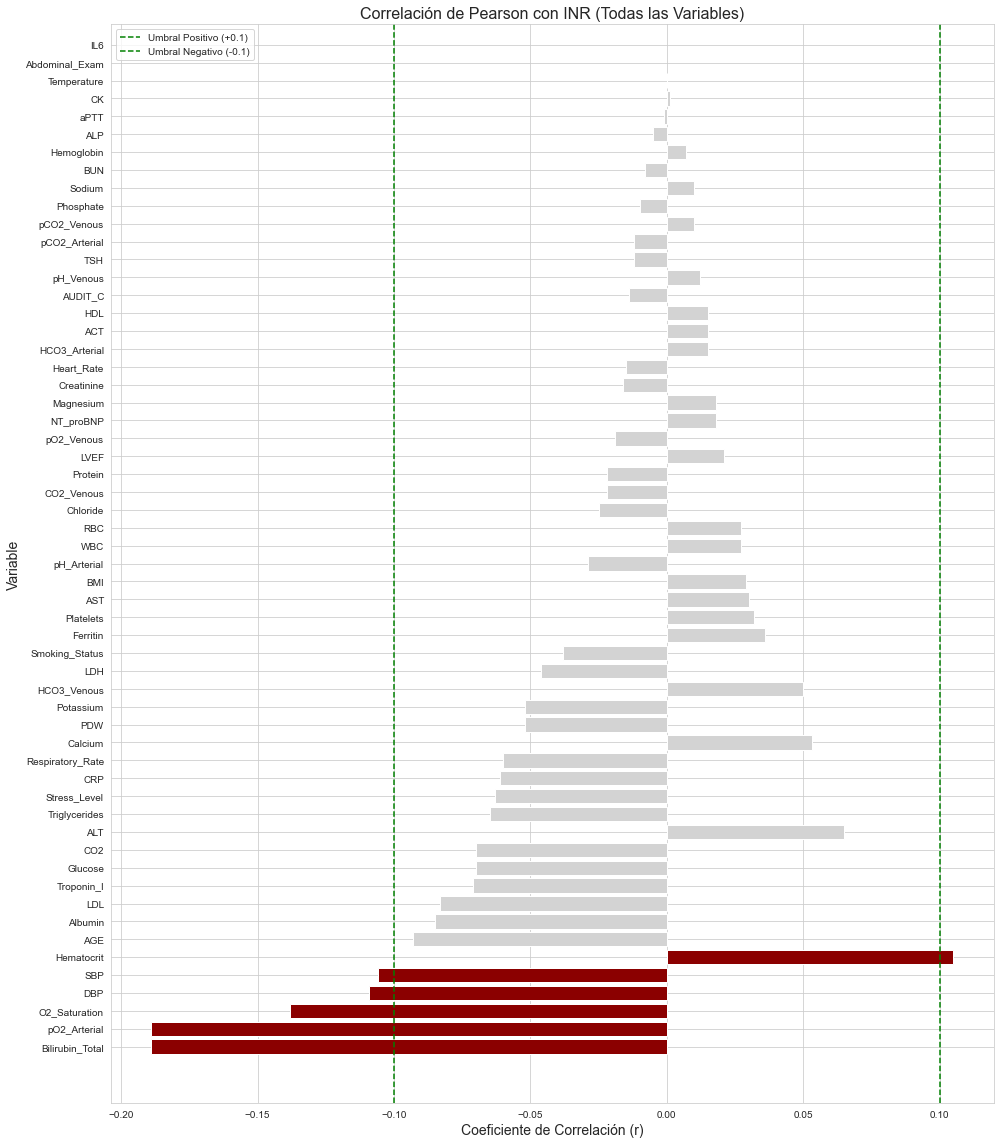

In [37]:
# --- A. Cargar y Filtrar el DataFrame ---
df = df_patients_observations_medications_INR

target_col = 'INR'
threshold = 0.10 
non_numeric_cols_to_keep = ['Id', 'GENDER']

# 1. Identificar las variables con correlación fuerte con INR
df_numeric = df.select_dtypes(include=np.number)
correlations = df_numeric.corr().loc[:, target_col].round(3)
correlations_abs_sorted = correlations.abs().sort_values(ascending=False)

# Filtrar las correlaciones que cumplen el umbral (incluimos 'INR' y las que pasan el umbral)
# Nota: La variable 'INR' siempre tendrá correlación 1 consigo misma, se incluye automáticamente.
# Esta variable 'selected_correlations' contiene SOLO las variables que se quedarán en el DF.
selected_correlations = correlations[correlations.abs() >= threshold]


# 2. Consolidar columnas y ACTUALIZAR el DataFrame (Sobrescribir 'df')
# Las columnas a mantener son las que pasaron el umbral, más las no-numéricas.
columns_to_keep = list(set(selected_correlations.index.tolist() + non_numeric_cols_to_keep))

# Asegurar que 'INR' se incluye si no pasó el umbral (aunque debería haber pasado con 1.0)
if target_col not in columns_to_keep:
    columns_to_keep.append(target_col)
    
df_patients_observations_medications_INR = df[columns_to_keep].copy() # Esta línea es la que SÍ actualiza el DF

# --- 5. Generar el Plot de Correlaciones (MODIFICADO) ---

plt.figure(figsize=(14, 16)) # Aumento el tamaño para acomodar más barras
sns.set_style("whitegrid")

# 1. Usar TODAS las correlaciones calculadas inicialmente (correlations)
# Asegúrate de excluir el 'INR' de la visualización si no quieres verlo con 1.0.
plot_data = correlations.drop(target_col, errors='ignore')

# 2. Ordenar TODAS las variables para el plot por el valor absoluto de la correlación
plot_correlations = plot_data.reindex(plot_data.abs().sort_values(ascending=False).index)

# 3. Definir colores: rojo oscuro para las que pasan el umbral, gris claro para las que no
colores = ['darkred' if abs(r) >= threshold else 'lightgray' for r in plot_correlations.values]


# Gráfico de barras
bars = plt.barh(plot_correlations.index, plot_correlations.values, color=colores)

# Añadir línea de umbral
plt.axvline(threshold, color='green', linestyle='--', linewidth=1.5, label=f'Umbral Positivo (+{threshold})')
plt.axvline(-threshold, color='green', linestyle='--', linewidth=1.5, label=f'Umbral Negativo (-{threshold})')

plt.title(f'Correlación de Pearson con INR (Todas las Variables)', fontsize=16)
plt.xlabel('Coeficiente de Correlación (r)', fontsize=14)
plt.ylabel('Variable', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 2254
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                543 non-null    object 
 1   AGE               543 non-null    float64
 2   GENDER            543 non-null    object 
 3   ACT               543 non-null    float64
 4   ALP               543 non-null    float64
 5   ALT               543 non-null    float64
 6   AST               543 non-null    float64
 7   AUDIT_C           543 non-null    float64
 8   Abdominal_Exam    0 non-null      float64
 9   Albumin           543 non-null    float64
 10  BMI               543 non-null    float64
 11  BUN               543 non-null    float64
 12  Bilirubin_Total   543 non-null    float64
 13  CK                543 non-null    float64
 14  CO2               543 non-null    float64
 15  CO2_Venous        543 non-null    float64
 16  CRP               543 non-null    float64
 

#### 2.3.1.1 Pair plots para detectar visualmente valoes atípicos y potenciales relaciones entre variables

Número de Pair Plots a generar: 1
Variables totales a plotear: 7



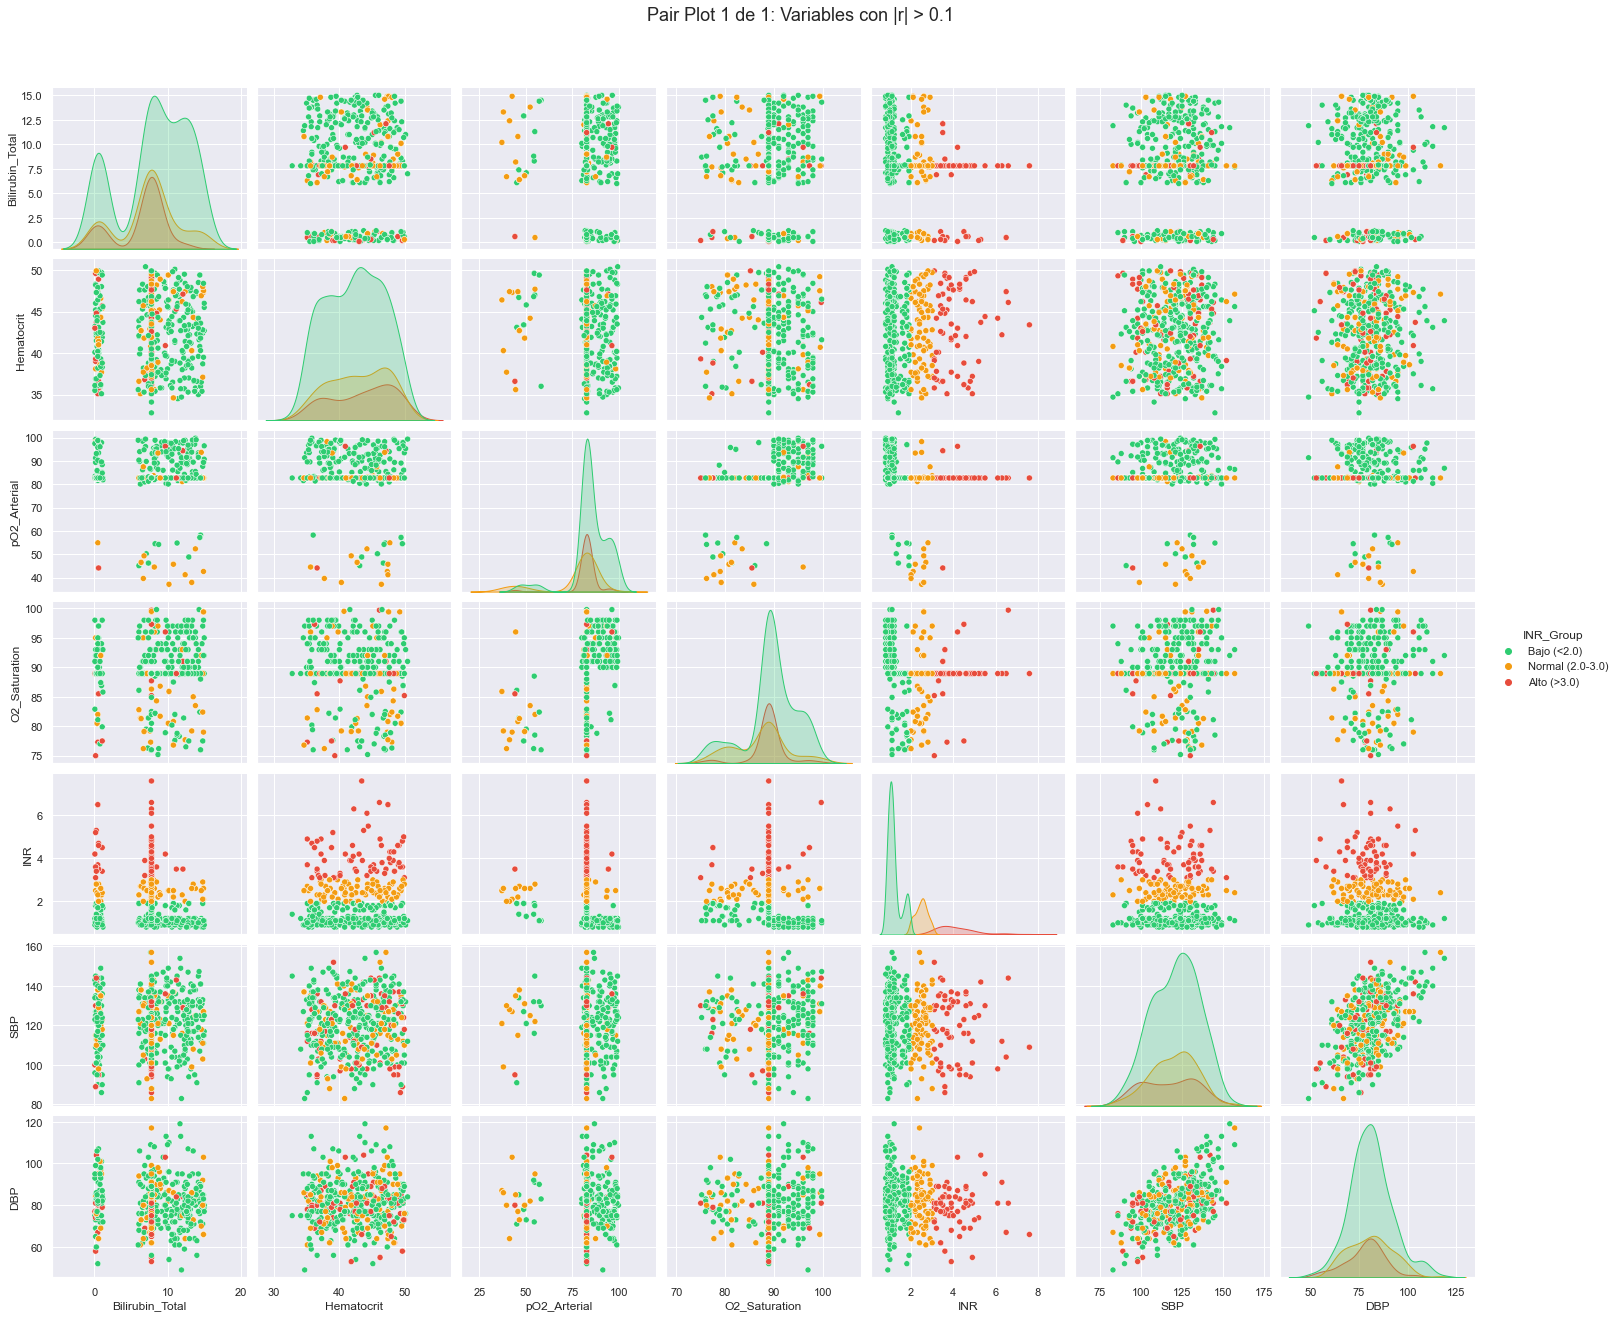

In [39]:

# Cargar el DataFrame
df = df_patients_observations_medications_INR
target_col = 'INR'
# 3. Crear la columna INR_Group (Necesaria para el 'hue' del pair plot)
bins = [df[target_col].min() - 1, 2.0, 3.0 + 1e-6, df[target_col].max() + 1]
df['INR_Group'] = pd.cut(df[target_col], 
                        bins=bins, 
                        labels=['Bajo (<2.0)', 'Normal (2.0-3.0)', 'Alto (>3.0)'], 
                        right=False, 
                        include_lowest=True).astype('category')

# --- B. Preparación para el Ploteo en Subgrupos ---

# 4. Obtener las características numéricas para plotear (excluyendo 'Id')
plot_features = df.select_dtypes(include=np.number).columns.tolist()
if 'Id' in plot_features:
    plot_features.remove('Id')

# 5. Dividir la lista en chunks de 5 variables
chunk_size = 7
chunks = [plot_features[i:i + chunk_size] for i in range(0, len(plot_features), chunk_size)]

# 6. Definir estilo y colores
colors = ["#2ecc71", "#f39c12", "#e74c3c"] # Verde, Amarillo, Rojo
hue_order=['Bajo (<2.0)', 'Normal (2.0-3.0)', 'Alto (>3.0)']
sns.set(font_scale = 1.0)
threshold_display = 0.10

# --- C. Generar los Plots ---

print(f"Número de Pair Plots a generar: {len(chunks)}")
print(f"Variables totales a plotear: {len(plot_features)}\n")

for i, chunk in enumerate(chunks):
    plot_df = df[chunk + ['INR_Group']]
    
    # Generar el pairplot
    ax = sns.pairplot(plot_df, 
                      hue='INR_Group', 
                      palette=colors, 
                      hue_order=hue_order, 
                      height=2.5, 
                      aspect = 1.2,
                      kind="scatter", 
                      diag_kind="kde") 

    title = f'Pair Plot {i+1} de {len(chunks)}: Variables con |r| > {threshold_display}'
    ax.fig.suptitle(title, size=18, y = 1.05)
    
    # Mostrar el plot
    plt.show()

A partir del análisis visual del pair plot, se observa que los pacientes clasificados como de mayor gravedad —especialmente aquellos en el grupo de alto riesgo o que no sobrevivieron— tienden a mostrar valores más extremos en varias variables clínicas clave. Destacan particularmente las elevaciones en INR y bilirrubina total, que parecen marcar una alteración sistémica más pronunciada y diferenciar con claridad a estos grupos respecto a los pacientes de bajo riesgo. Del mismo modo, la saturación de oxígeno revela una separación evidente: los pacientes con mejor pronóstico se concentran en valores altos y estables, mientras que los grupos críticos presentan mayor dispersión y caídas significativas. En contraste, variables como el hematocrito o la pO₂ arterial no muestran patrones tan definidos, y sólo la relación esperada entre la presión sistólica y diastólica mantiene una correlación clara. En conjunto, el gráfico sugiere que el riesgo clínico no depende de una sola medida, sino de un perfil en el que los marcadores hepáticos y la oxigenación desempeñan un papel central para distinguir entre estabilidad y deterioro.

#### 2.3.1.2. Distribución de frecuencias

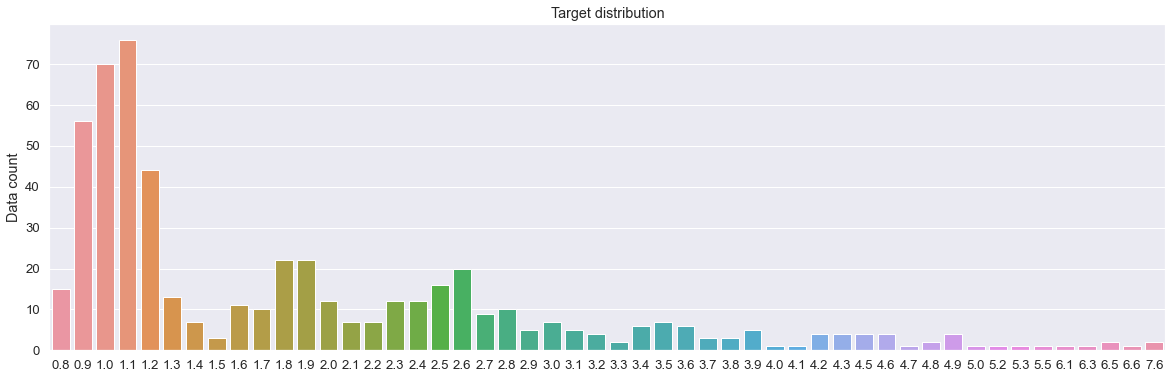

In [40]:
plt.figure(figsize=(20, 6))  # Ajusta los valores según lo grande que lo quieras

sns.set(font_scale=1.2)
sns.countplot(x="INR", data=df)

plt.ylabel("Data count")
plt.xlabel("")
plt.title("Target distribution")

plt.show()


--- Distribución de la Columna Target (INR_Group) ---
Bajo (<2.0)         349
Normal (2.0-3.0)    117
Alto (>3.0)          77
Name: INR_Group, dtype: int64


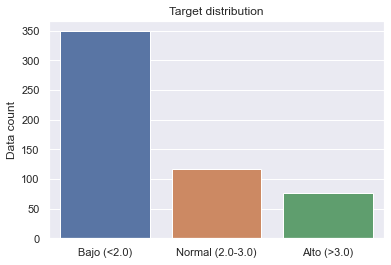

In [41]:
# 3. Crear la columna INR_Group (Necesaria para el 'hue' del pair plot)
bins = [df[target_col].min() - 1, 2.0, 3.0 + 1e-6, df[target_col].max() + 1]
df['INR_Group'] = pd.cut(df[target_col], 
                        bins=bins, 
                        labels=['Bajo (<2.0)', 'Normal (2.0-3.0)', 'Alto (>3.0)'], 
                        right=False, 
                        include_lowest=True).astype('category')

sns.set(font_scale = 1)
sns.countplot(x="INR_Group", data=df).set(ylabel = "Data count"
            , xlabel = "")
plt.title('Target distribution')

print('--- Distribución de la Columna Target (INR_Group) ---')
conteo_inr = df['INR_Group'].value_counts()
print(conteo_inr)

#### 2.3.1.4 ROC AUC

In [42]:
from sklearn.metrics import mutual_info_score, roc_auc_score

numerical = df.select_dtypes(include=['int64','float64']).columns.tolist() # for numbers

feature_scores = []

for col in numerical:       
    auc = roc_auc_score(df.INR_Group, df[col]) 
    if auc < 0.5: # in case the feature is negatively correlated with the target
        auc = roc_auc_score(df.INR_Group, -df[col]) 
    feature_scores.append((col, auc))

columns = ['feature', 'ROC_AUC']
df_scores = pd.DataFrame(feature_scores, columns=columns)
df_scores.sort_values(by=['ROC_AUC'],ascending=False).reset_index(drop = True)

ValueError: multi_class must be in ('ovo', 'ovr')

### 2.3.3 Oversampling con SMOTE

In [ ]:
# MÉTODO 4: SMOTE (requiere imblearn)
# IMPORTANTE: SMOTE solo funciona con datos numéricos
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Separar features y target
X = df.drop('INR_Group', axis=1).copy()
y = df['INR_Group']

# PASO CRÍTICO: Convertir variables categóricas a numéricas
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
label_encoders = {}

print("MÉTODO 4 - SMOTE (con codificación de variables categóricas):")
print(f"Columnas categóricas encontradas: {list(categorical_columns)}\n")

for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Verificar que todas las columnas sean numéricas
print(f"Tipos de datos después de codificación:")
print(X.dtypes)
print()

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Crear DataFrame balanceado
df_smote = pd.DataFrame(X_resampled, columns=X.columns)

# Decodificar variables categóricas de vuelta a su forma original
for col in categorical_columns:
    # Redondear valores (SMOTE genera valores continuos)
    X_resampled_col = np.round(df_smote[col]).astype(int)
    # Limitar al rango válido
    X_resampled_col = np.clip(X_resampled_col, 0, len(label_encoders[col].classes_) - 1)
    df_smote[col] = label_encoders[col].inverse_transform(X_resampled_col)

df_smote['INR_Group'] = y_resampled

print("Distribución con SMOTE:")
print(df_smote['INR_Group'].value_counts())
print(f"Total: {len(df_smote)} registros\n")
print("="*60 + "\n")

MÉTODO 4 - SMOTE (con codificación de variables categóricas):
Columnas categóricas encontradas: ['GENDER', 'Id']

Tipos de datos después de codificación:
Hematocrit         float64
GENDER               int32
DBP                float64
SBP                float64
INR                float64
Bilirubin_Total    float64
pO2_Arterial       float64
O2_Saturation      float64
Id                   int32
dtype: object

Distribución con SMOTE:
Bajo (<2.0)         349
Normal (2.0-3.0)    349
Alto (>3.0)         349
Name: INR_Group, dtype: int64
Total: 1047 registros




c:\Users\VALER\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


--- Distribución de la Columna Target (INR_Group) ---
Bajo (<2.0)         349
Normal (2.0-3.0)    349
Alto (>3.0)         349
Name: INR_Group, dtype: int64


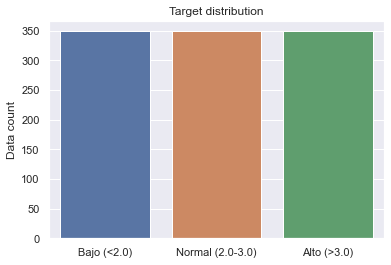

In [ ]:
# 3. Crear la columna INR_Group (Necesaria para el 'hue' del pair plot)
df = df_smote

bins = [df[target_col].min() - 1, 2.0, 3.0 + 1e-6, df[target_col].max() + 1]
df['INR_Group'] = pd.cut(df[target_col], 
                        bins=bins, 
                        labels=['Bajo (<2.0)', 'Normal (2.0-3.0)', 'Alto (>3.0)'], 
                        right=False, 
                        include_lowest=True).astype('category')

sns.set(font_scale = 1)
sns.countplot(x="INR_Group", data=df).set(ylabel = "Data count"
            , xlabel = "")
plt.title('Target distribution')

print('--- Distribución de la Columna Target (INR_Group) ---')
conteo_inr = df['INR_Group'].value_counts()
print(conteo_inr)

La Historia del Desbalance de Clases y Cómo Resolverlo
El Problema: Un Dataset Desbalanceado
Imagina que eres un médico que quiere entrenar un modelo de inteligencia artificial para predecir niveles de INR (un indicador de coagulación sanguínea) en pacientes. Recolectas datos y te encuentras con esto:

349 pacientes con INR Bajo (<2.0)
117 pacientes con INR Normal (2.0-3.0)
77 pacientes con INR Alto (>3.0)

¿Por qué es esto un problema?
Cuando entrenas un modelo de machine learning con estos datos, el modelo se vuelve "perezoso". Piensa: "Si siempre predigo 'Bajo', acertaré el 64% de las veces sin esfuerzo". Entonces el modelo aprende a ignorar las clases minoritarias (Normal y Alto) porque aparecen poco en los datos de entrenamiento.
Consecuencia grave: Tu modelo será excelente prediciendo INR Bajo, pero terrible prediciendo INR Alto, que es justamente el caso más peligroso médicamente (riesgo de hemorragia). ¡Esto podría costar vidas!

Solución 1: Oversampling (Bootstrap) - "La Clonación Simple"
¿Qué hace?
Oversampling es como hacer fotocopias de tus pacientes minoritarios hasta que tengas la misma cantidad de cada clase.
Proceso:

Tienes 77 pacientes con INR Alto
Los "clonamos" aleatoriamente (con reemplazo) hasta llegar a 349
Ahora tienes 349 de cada clase

Analogía:
Imagina una clase de 30 estudiantes donde solo hay 3 mujeres. Para balancear, traes fotocopias de esas 3 mujeres hasta tener 15 copias de cada una. Ahora tienes 15 hombres y 15 "copias" de mujeres.
Ventajas:

✅ Súper simple de implementar
✅ Funciona con cualquier tipo de dato (texto, números, fechas)
✅ No pierdes información original
✅ El modelo ahora "ve" las clases minoritarias con la misma frecuencia

Desventajas:

⚠️ Memorización: Al duplicar exactamente los mismos pacientes, el modelo puede memorizar esos casos específicos en lugar de aprender patrones generales
⚠️ Overfitting: Si entrenas demasiado, el modelo se "especializa" en esas copias exactas

Cuándo usarlo: Cuando tienes datos con texto, fechas o categorías, o cuando quieres algo rápido y funcional.

Solución 2: SMOTE - "El Creador de Pacientes Sintéticos"
¿Qué hace?
SMOTE es más sofisticado. En lugar de clonar, SMOTE crea nuevos pacientes sintéticos que son similares pero no idénticos a los existentes.
¿Cómo funciona? (Narrativa paso a paso)
Imagina que tienes estos dos pacientes reales con INR Alto:
Paciente A: Edad=60, Peso=70kg, Dosis Warfarina=5mg
Paciente B: Edad=70, Peso=80kg, Dosis Warfarina=7mg
SMOTE dice: "Estos dos pacientes son similares. Probablemente podría existir un paciente intermedio entre ellos."
SMOTE crea:
Paciente C (sintético): Edad=65, Peso=75kg, Dosis Warfarina=6mg
Este paciente no existe en la vida real, pero es plausible basándose en los patrones de los datos.
Analogía:
Volviendo a la clase con 3 mujeres: en lugar de traer fotocopias exactas, SMOTE observa las características de esas 3 mujeres (altura, edad, intereses) y crea nuevas estudiantes sintéticas con características intermedias.
Si María mide 1.60m y tiene 20 años, y Ana mide 1.70m y tiene 22 años, SMOTE crea a "Lucía" (sintética) que mide 1.65m y tiene 21 años.
El Proceso Técnico:

Encuentra vecinos cercanos: Para cada paciente minoritario, SMOTE busca sus 5 vecinos más similares (misma clase)
Calcula distancias: Mide qué tan diferentes son en cada variable
Interpola: Crea un punto aleatorio entre el paciente original y uno de sus vecinos
Repite: Hace esto hasta balancear las clases

Ventajas:

✅ Más variedad: Crea datos nuevos, no duplicados
✅ Reduce overfitting: El modelo no memoriza, aprende patrones
✅ Mejor generalización: Los datos sintéticos capturan la "esencia" de la clase sin ser copias exactas
✅ Más realista: Los nuevos datos son plausibles médicamente

Desventajas:

⚠️ Solo datos numéricos: No puede promediar "F" y "M" directamente (necesitas LabelEncoder)
⚠️ Más complejo: Requiere preprocesamiento
⚠️ Puede generar outliers: Si los vecinos están muy dispersos, puede crear casos extraños


¿Por Qué Usar Estas Técnicas con TUS Datos de INR?
1. Desbalance crítico:
Tu ratio es 349:117:77 (4.5:1.5:1). Sin balanceo, tu modelo será inútil para predecir INR Alto, que es clínicamente el más importante.
2. Consecuencias médicas:
Un INR Alto significa riesgo de hemorragia. No detectarlo puede ser mortal. Necesitas que tu modelo sea bueno prediciendo esta clase minoritaria.
3. Datos limitados:
Con solo 77 casos de INR Alto, tu modelo tiene muy poco material para aprender. El balanceo le da más ejemplos para entrenar.
4. Mejora del rendimiento:
Sin balanceo:

Accuracy general: 64% (solo prediciendo "Bajo" siempre)
Recall para "Alto": ~0-10% (terrible)

Con balanceo:

Accuracy: 70-85%
Recall para "Alto": 60-80% (mucho mejor)


¿Cuál Elegir para tus Datos de INR?
Usa Oversampling (Bootstrap) si:

Tienes variables categóricas que no quieres convertir (género, grupo sanguíneo)
Quieres algo rápido y simple
Vas a usar validación cruzada (reduce overfitting)
Tienes MUY pocos datos (<50 por clase)

Usa SMOTE si:

La mayoría de tus variables son numéricas (edad, peso, dosis)
Quieres el mejor rendimiento posible
Te preocupa el overfitting
Tienes suficientes datos para crear buenos vecinos (>50 por clase)


Recomendación Final para tu Caso
Para tu dataset de INR con 349/117/77:
🏆 SMOTE es la mejor opción porque:

Los datos médicos son principalmente numéricos (edad, peso, dosis, laboratorios)
77 casos es suficiente para que SMOTE encuentre buenos vecinos
En medicina, la precisión importa: mejor crear pacientes sintéticos plausibles que duplicar exactos
Reduces significativamente el overfitting

Implementación práctica:
python# Codifica género: F→0, M→1
# Aplica SMOTE para crear ~270 pacientes sintéticos
# Resultado: 349 de cada clase, con variedad real
Validación crucial: Después de balancear, usa stratified k-fold cross-validation para asegurar que tu modelo generaliza bien y no solo memoriza.